In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]
#commit, aby ukryc api

In [0]:
#!dw configure
#commit, aby ukryc api

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [5]:
!pwd

/content


In [0]:
#drive.mount("/content/drive")
#commit, aby ukryc api

In [7]:
cd "drive/My Drive/Colab Notebooks/ML_matrix_challenge"

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge


In [8]:
!pwd

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge


In [0]:
ls

ML_matrix_challenge/


In [0]:
cd ML_matrix_challenge/

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge/ML_matrix_challenge


In [0]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [9]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [0]:
!mkdir data

In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [13]:
df = data.dataframes['7004_1']
df.shape
#sprawdzamy jak duzo mamy takich danych

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [14]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
16286,AVpfj2VPLJeJML43_b4Q,NaN,Asics,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",NaN,NaN,2016-09-27T02:45:25Z,2016-09-27T02:45:25Z,"[{""dateSeen"":[""2016-09-27T02:45:25Z""],""sourceU...",NaN,8.894361e+11,"[{""key"":""Style"",""value"":[""Running, Cross Train...",NaN,http://i.ebayimg.com/images/g/GNkAAOSw6n5XwIcI...,NaN,newasicsh5q4n5301gellyteiiimonacobluemensrunni...,NaN,NaN,"[{""dateSeen"":[""2016-09-26T00:00:00Z""],""name"":""...",New Asics H5q4n.5301 Gel Lyte Iii Monaco Blue ...,55.95,55.95,NaN,NaN,New with box,NaN,USD,2016-09-27T02:45:25Z,2016-09-26T00:00:00Z,NaN,true,topbranditemstopbranditems - Ebay.com,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/New-Asics-H5Q4N-5301-G...,NaN,NaN,NaN,7.5,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-A...",http://www.ebay.com/itm/New-Asics-H5Q4N-5301-G...,889436050571,NaN,NaN,NaN
16787,AVpflqWTilAPnD_xeiro,NaN,Ray-Ban,"3513M Aviator Flat Metal,Ray-Ban,Clothing, Sho...","Lens color Blue,Frame color Silver",NaN,2016-02-14T11:25:12Z,2016-05-21T05:17:19Z,NaN,NaN,8.053672e+12,"[{""key"":""Bridge"",""value"":[""17mm""]},{""key"":""Fac...",NaN,https://www.sunglassesshop.com/FileRepository/...,NaN,newraybanrb3513jm164t3aviatorflatmetalmenssung...,NaN,3513M,"[{""address"":""Customer Services Sunglasses Shop...",New Ray Ban Rb3513jm 164t3 Aviator Flat Metal ...,184.28,184.28,NaN,NaN,new,NaN,USD,2016-02-14T11:25:12Z,2015-11-08T00:00:00Z,NaN,false,framesdirect.com,42% Off,Returning your sunglasses is easy at Sunglasse...,Free Shipping,NaN,NaN,http://www.framesdirect.com/framesfp/Ray-Ban-l...,NaN,NaN,"[{""date"":""2014-09-09T00:00:00Z"",""dateAdded"":""2...",NaN,"[{""sourceURLs"":[""https://www.sunglassesshop.co...",http://www.ebay.com.au/itm/NEW-Ray-Ban-RB3513J...,NaN,NaN,NaN,NaN
17016,AVpftilzilAPnD_xg3pR,NaN,Akubra,"Clothing, Shoes & Accessories,Unisex Clothing,...","cmout of stock,cm",NaN,2016-05-15T13:00:35Z,2016-09-23T12:28:53Z,"[{""dateSeen"":[""2016-09-23T12:28:53Z""],""sourceU...",NaN,NaN,"[{""key"":""Colour"",""value"":[""Beige""]},{""key"":""Ma...",NaN,http://i.ebayimg.com/thumbs/images/g/9ZwAAOSwm...,NaN,"akubra/481481,akubrariverinawidebrimfelthatsan...",NaN,481481,"[{""dateSeen"":[""2016-09-22T00:00:00Z""],""name"":""...",Akubra Riverina Wide Brim Felt Hat - Sand,159.50,159.50,NaN,NaN,New with tags,NaN,AUD,2016-05-15T13:00:35Z,2016-06-06T00:00:00Z,NaN,false,NaN,NaN,NaN,AUD 46.17,NaN,NaN,http://www.ebay.com/itm/AKUBRA-Riverina-WIDE-B...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/AKUBR...",http://www.ebay.com/itm/AKUBRA-Riverina-WIDE-B...,NaN,NaN,NaN,NaN
344,AVpfMack1cnluZ0-f6ZB,NaN,ANDREW MARC,"All Men's Clothing,Men's Clothing,Men's Outerw...","Brown,Designer Styles",NaN,2016-01-02T03:38:57Z,2016-01-15T21:37:52Z,NaN,NaN,NaN,"[{""key"":""Style"",""value"":[""Jackets""]}]",NaN,http://c.shld.net/rpx/i/s/pi/mp/6245/prod_3800...,NaN,andrewmarc/mjmomm3a1912pt,NaN,mjmoMM3A1912PT,NaN,Andrew Marc Varick Men's Removable Hooded Leat...,99.99,99.99,NaN,NaN,NaN,NaN,USD,2016-01-02T03:38:57Z,2016-01-15T00:00:00Z,NaN,true,Sears.com,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,XL,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/config/produc...,NaN,NaN,NaN,NaN
8512,AVpfNjvx1cnluZ0-gSCI,NaN,Cole Haan,"Clothing, Shoes & Accessories,Casual,Men's Shoes",NaN,NaN,2016-04-03T02:01:01Z,2016-05-02T00:53:06Z,NaN,NaN,8.892033e+11,"[{""key"":""Style"",""value"":[""Elegant""]},{""ke

In [15]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [16]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [17]:
df.prices_currency.value_counts(normalize=True)
#sprawdzamy, czego jest najwiecej
#normalize=True daje nam wartosc procentowa

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
New with box                                          0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
new                                                   0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

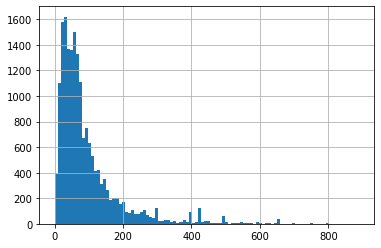

In [18]:
df_usd = df[ df.prices_currency == 'USD' ].copy()
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
filter_max = np.percentile( df_usd['prices_amountmin'], 99)
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max ]

df_usd_filter.prices_amountmin.hist(bins=100)

#ten filtr: df.prices_currency == 'USD' mowi: wybierz mi
#wiersze, ktore w kolumnie prices_currency maja USD


#jesli wywalimy normalize=True (bedziemy miec: df.prices_currency.value_counts() ) 
#to mozna sprawdzic, czy liczba 18524 sie zgadza

In [0]:
#rzutujemy na float:
#df_usd.prices_amountmin.astype(np.float)


In [0]:
df_usd_filter.to_csv('data/men_shoes.csv', index=False)

In [20]:
#funkcja percentile  usuwa wartosci odstajace
#np.percentile( df_usd['prices_amountmin'], 99)
#zapis oznacza: w 99% przypadkow buty kosztuja 895 dolarow, albo mniej
!pwd


/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge


/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge/ML_matrix_challenge/matrix_one


In [25]:
cd matrix_one/

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge/ML_matrix_challenge/matrix_one


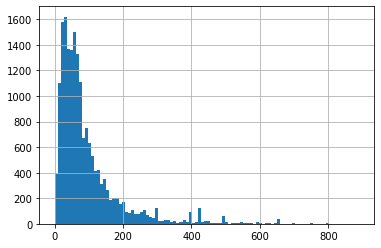

In [0]:

#w razie klopotow - dluzsza wersja: df_usd['prices_amountmin'] napewno zadziala

In [35]:
!pwd

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge/ML_matrix_challenge/matrix_one


In [0]:
!git add day4_matrix.ipynb

In [37]:
!git commit -m ""


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@4bf0b0fc5972.(none)')


In [0]:
!git add day4_matrix.ipynb

In [40]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date


In [41]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
